# Fuzzy Clustering

In this notebook, we will explore the fuzzy clustering approach with the iris dataset. We will perform following tasks. 

1. The US Arrest dataset has 4 features. Reduce the number of the features to 2 using PCA. Apply standardization before applying PCA.
2. Vary the number of centers and apply fuzzy C-means on this transformed data. Identify the right number of clusters.  
3. Show the strong and weak members of Cluster 2 

In [1]:
import skfuzzy as fuzz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

### Configure some general styling

In [2]:
sns.set_style("white")
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['figure.figsize'] = (8,7)
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

### T1. Read the data

Read the data from this location: `/dsa/data/DSA-8410/USArrests.csv`

In [3]:
df = pd.read_csv("/dsa/data/DSA-8410/USArrests.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


### T2. Standardize the data

In [4]:
# Assuming we need to drop the states
df = df.drop("Unnamed: 0", axis=1)
df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [5]:
X_std = StandardScaler().fit_transform(df)

### T3. Apply PCA

In [6]:
pca = PCA(n_components=2)
components = pca.fit_transform(X_std)

### T4. Reshape the data for fuzzy c-means

In [7]:
data = components.T

In [8]:
np.shape(data)

(2, 50)

### T5. Visualize the data in 2D space

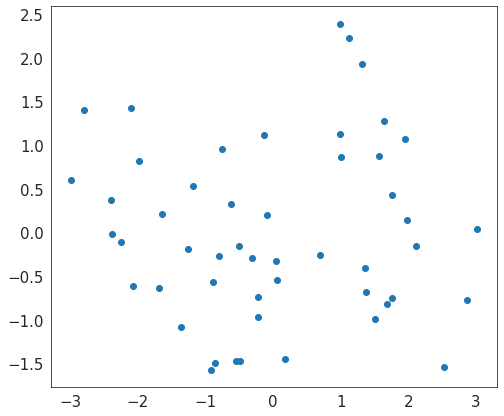

In [9]:
plt.scatter(data[0,:],data[1,:]);

### T6. Choose the right number of clusters using the fuzzy partition coefficient (FPCs). Plot FPCs vs #clusters. For this plot, choose a suitable set of clusters.  

In [10]:
maxCenters= 5
FPCs=[]
for ncenters in range(2, maxCenters + 1):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        data,  ncenters, 2, error=0.005, maxiter=1000, init=None)
    FPCs.append(fpc)

Text(0, 0.5, 'fuzzy partition coefficient')

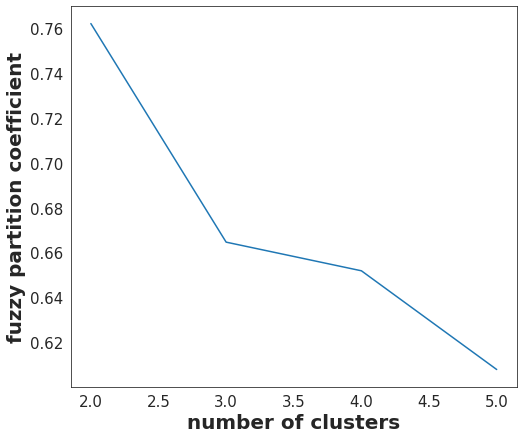

In [11]:
plt.plot(range(2, maxCenters + 1),FPCs)
plt.xlabel("number of clusters")
plt.ylabel("fuzzy partition coefficient")

### T7. Apply fuzzy c-means with the suitable number of clusters identified in T5

In [12]:
# Based on the above it looks like 2 clusters is the best fit

ncenters=2

cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, ncenters, 2, error=0.005, maxiter=3000, init=None)

### T8. Visualize the clusters with centers

Text(0.5, 1.0, 'Visualization of the clusters (c-means)')

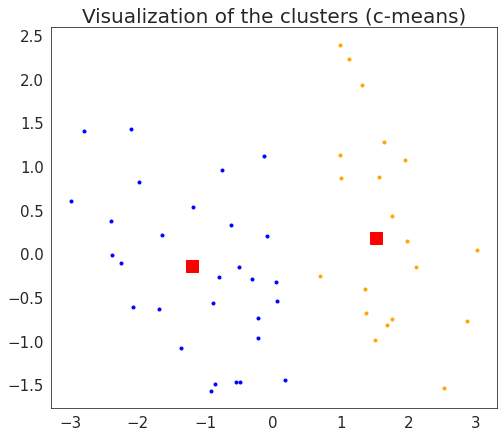

In [13]:
# Plot assigned clusters, for each data point in training set
cluster_membership = np.argmax(u, axis=0)
for j in range(ncenters):
    plt.plot(data[0,:][cluster_membership == j],data[1,:][cluster_membership == j], 
             '.', color=colors[j])

# Mark the center of each fuzzy cluster
for pt in cntr:
    plt.plot(pt[0], pt[1], 'rs', markersize=12)

plt.title("Visualization of the clusters (c-means)")

### T9. Indentify the strongest and weakest member of Cluster #2. Visualize these two points.

In [14]:
weak = u[1,:].min()
strong = u[1,:].max()
weakIdx = u[1,:].argmin()
strongIdx = u[1,:].argmax()

print(f"{weakIdx}-th sample is the weakest member and the probability is {weak}")
print(f"{strongIdx}-th sample is the strongest member and the probability is {strong}")

26-th sample is the weakest member and the probability is 0.0007820710103154669
19-th sample is the strongest member and the probability is 0.986951493938215


Text(0.5, 1.0, 'Visualization of the clusters#2 and membership')

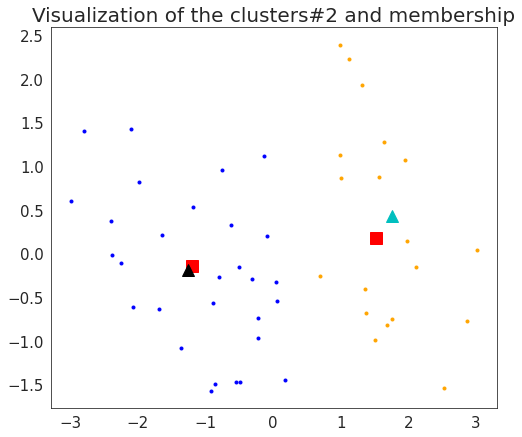

In [15]:
for j in range(ncenters):
    plt.plot(data[0,:][cluster_membership == j],data[1,:][cluster_membership == j], 
             '.', color=colors[j])
    
# Mark the center of each fuzzy cluster
for pt in cntr:
    plt.plot(pt[0], pt[1], 'rs', markersize=12)
    
plt.plot(data[0,weakIdx],data[1,weakIdx],'^k:', markersize=12)
plt.plot(data[0,strongIdx],data[1,strongIdx],'^c:', markersize=12)

plt.title("Visualization of the clusters#2 and membership")

### T10. Do these weak and strong points make sense? Why or Why not?

Yes these points make sense. The Cyan Triangle being the strongest point in cluster 2 makes sense since it is the closest to the identified center of the cluster (red square) while the black triangle also has the closest relationship with the center of the first cluster. Since these 2 points are closest to their respective cluster centers it would make sense they are the polar opposites of each other as far as member probability.